In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *
from my_utils import *

In [2]:
t = np.linspace(0,100,10000,endpoint=False)

(0, 10)

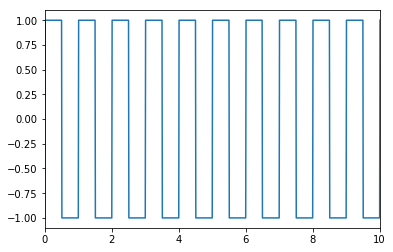

In [3]:
f = 1.
clk = sqwave(2*np.pi*t/f)
plt.plot(t,clk)
plt.xlim(0,10)

In [4]:
def pwm(clk,val,bits):
    cnt = 0
    flag = 0
    last_flag = 0
    last_clk = 0
    pwm_i = 0
    
    output = np.zeros(len(clk))
    for i in range(len(clk)):
        this_clk = clk[i]
        
        if (last_clk < 0.5) and (this_clk >= 0.5): # we have a rising edge
            
            cnt = (cnt + val) % (2**(bits+1))
            flag = (cnt>>bits)&1 # msb of counter
            
            pwm_i = last_flag ^ flag
            
            last_flag = flag
        
        output[i] = pwm_i
        last_clk = this_clk
        
    return output
        
        

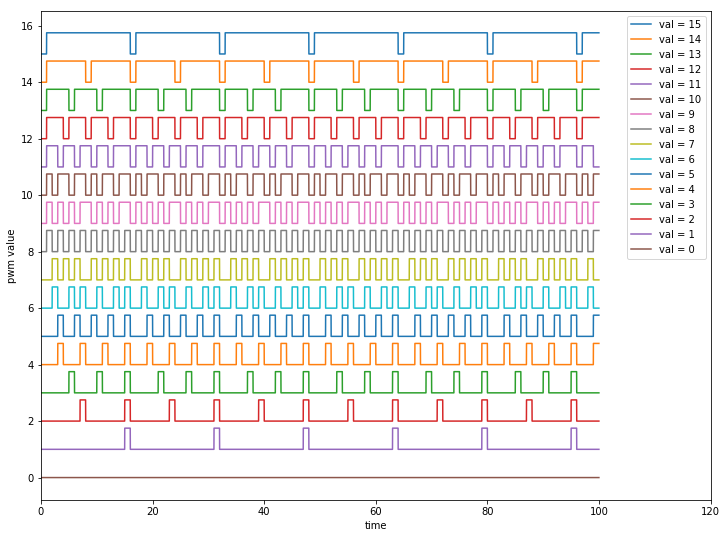

In [15]:

big_figure()

#4 bits = maximum period length of 16 cycles

bits = 4

for i in range(15,-1,-1):
    val = i
    y = 0.75*pwm(clk,val,bits) + i
    plt.plot(t,y,label="val = {:d}".format(val))

plt.legend()
plt.xlim(0,120)
plt.xlabel("time")
plt.ylabel("pwm value")
plt.show()
